## Brownian Walker—Functionality Demonstration

### 1. Simple Brownian Walk generation with Gaussian Kernel

t = 1
t = 2
t = 3
t = 4
t = 5
t = 6
t = 7
t = 8
t = 9
t = 10
t = 11
t = 12
t = 13
t = 14
t = 15
t = 16
t = 17
t = 18
t = 19
t = 20
t = 21
t = 22
t = 23
t = 24
t = 25
t = 26
t = 27
t = 28
t = 29
t = 30
t = 31
t = 32
t = 33
t = 34
t = 35
t = 36
t = 37
t = 38
t = 39
t = 40
t = 41
t = 42
t = 43
t = 44
t = 45
t = 46
t = 47
t = 48
t = 49
t = 50
t = 51
t = 52
t = 53
t = 54
t = 55
t = 56
t = 57
t = 58
t = 59
t = 60
t = 61
t = 62
t = 63
t = 64
t = 65
t = 66
t = 67
t = 68
t = 69
t = 70
t = 71
t = 72
t = 73
t = 74
t = 75
t = 76
t = 77
t = 78
t = 79
t = 80
t = 81
t = 82
t = 83
t = 84
t = 85
t = 86
t = 87
t = 88
t = 89
t = 90
t = 91
t = 92
t = 93
t = 94
t = 95
t = 96
t = 97
t = 98
t = 99
Debug: walk.length = 100


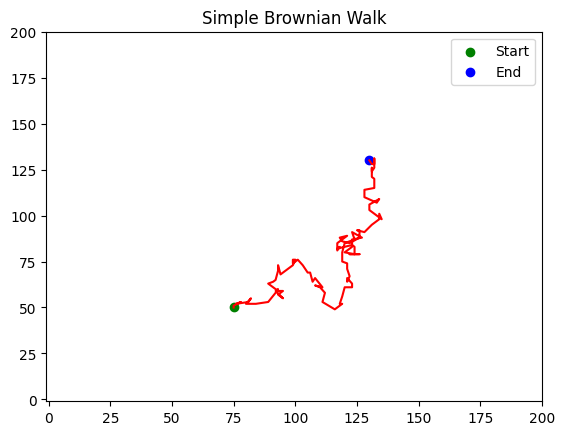

''

t = 1
t = 2
t = 3
t = 4
t = 5
t = 6
t = 7
t = 8
t = 9
t = 10
t = 11
t = 12
t = 13
t = 14
t = 15
t = 16
t = 17
t = 18
t = 19
t = 20
t = 21
t = 22
t = 23
t = 24
Debug: walk.length = 25
Länge des Pfads: 25 Punkte


In [1]:

from random_walk_package.core.BrownianWalker import BrownianWalker

with BrownianWalker(T=100, W=200, H=200, S=5) as walker:
    walker.generate(start_x=75, start_y=50)
    path1 = walker.backtrace(end_x=130, end_y=130, plot=True, plot_title="Simple Brownian Walk")
;

### 2. Define custom kernels like this:

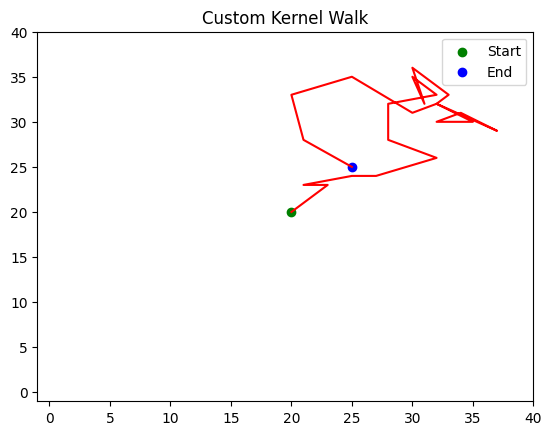

''

In [2]:
import numpy as np

S = 5
with BrownianWalker(T=25, W=40, H=40) as walker:
    custom_kernel = np.random.rand(2 * S + 1, 2 * S + 1).astype(np.float64)
    custom_kernel /= custom_kernel.sum()
    walker.set_kernel(custom_kernel, S=S)
    walker.generate(start_x=20, start_y=20)
    path2 = walker.backtrace(end_x=25, end_y=25, plot=True, plot_title="Custom Kernel Walk")
    print(f"Länge des Pfads: {len(path2)} Punkte")
;

## 3. Terrain-based generation

- Terrain Objects influence how the Walker moves. They are defined by text files as 'delim' separated MESA landcover values.
- Different landmark types receive different kernel parameters. Water areas are avoided in this example. Customize Kernel Mapping based on animal type or use case. There are four presets: LIGHT, MEDIUM, HEAVY, AMPHIBIAN, AIRBORNE with pre-defined kernel parameters. Kernel Parameters include step_size, diffusity, width and height and can be fully customized
- Note: Once passed to the Walker Object, the Walker takes ownership of the allocated memory of terrain and kernel_mapping

In [3]:
from random_walk_package.bindings.data_structures.kernel_terrain_mapping import *
from random_walk_package.bindings import *

terrain = create_terrain_map('terrain_baboons.txt', ' ')

kernel_mapping = create_brownian_kernel_parameters(animal_type=MEDIUM, base_step_size=7)
set_landmark_mapping(kernel_mapping, GRASSLAND, is_brownian=True, step_size=5, directions=6, diffusity=1)
set_landmark_mapping(kernel_mapping, TREE_COVER, is_brownian=True, step_size=5, directions=1, diffusity=2.6)
set_forbidden_landmark(kernel_mapping, WATER)
# hier noch die dinger plotten also kernels und terrain


Now the terrain based walk can be created with the parameters above (if no custom kernel mapping is passed, a default one is used)

In [ ]:
with BrownianWalker(T=50, terrain=terrain, k_mapping=kernel_mapping) as walker:
    walker.generate_from_terrain(start_x=50, start_y=50)
    path3 = walker.backtrace_from_terrain(end_x=100, end_y=100, plot=True)
    print(f"   Terrain Walk: {len(path3)} Punkte")
